In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\manth\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv("Walmart.csv")

In [4]:
data

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
...,...,...,...,...,...,...,...,...,...,...,...
10046,9996,WALM056,Rowlett,Fashion accessories,$37,3.0,03/08/23,10:10:00,Cash,3.0,0.33
10047,9997,WALM030,Richardson,Home and lifestyle,$58,2.0,22/02/21,14:20:00,Cash,7.0,0.48
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [6]:
data.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [7]:
data["unit_price"] =data["unit_price"].replace("[\$,]", "", regex=True).astype(float)

In [14]:
data["unit_price"].fillna(data["unit_price"].mean())

0        74.69
1        15.28
2        46.33
3        58.22
4        86.31
         ...  
10046    37.00
10047    58.00
10048    52.00
10049    79.00
10050    62.00
Name: unit_price, Length: 10051, dtype: float64

In [15]:
data["quantity"].fillna(data["quantity"].median())

0        7.0
1        5.0
2        7.0
3        8.0
4        7.0
        ... 
10046    3.0
10047    2.0
10048    3.0
10049    2.0
10050    3.0
Name: quantity, Length: 10051, dtype: float64

In [16]:
data.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [10]:
data.shape

(10051, 11)

In [11]:
data.describe()

,invoice_id,unit_price,quantity,rating,profit_margin
count,10051.000000,10020.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,50.630053,2.353493,5.825659,0.393791
std,2901.174372,21.197783,1.602658,1.763991,0.090669
min,1.000000,10.080000,1.000000,3.000000,0.180000
25%,2513.500000,32.000000,1.000000,4.000000,0.330000
50%,5026.000000,51.000000,2.000000,6.000000,0.330000
75%,7538.500000,69.000000,3.000000,7.000000,0.480000
max,10000.000000,99.960000,10.000000,10.000000,0.570000


In [17]:
data['Revenue'] = data['unit_price'] * data['quantity']
data

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Revenue
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...
10046,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,03/08/23,10:10:00,Cash,3.0,0.33,111.00
10047,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,22/02/21,14:20:00,Cash,7.0,0.48,116.00
10048,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,15/06/23,16:00:00,Credit card,4.0,0.48,156.00
10049,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,25/02/21,12:25:00,Cash,7.0,0.48,158.00


In [18]:
data['Profit'] = data['Revenue'] * data['profit_margin']
data

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Revenue,Profit
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83,250.9584
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40,36.6720
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31,107.0223
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76,153.7008
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17,290.0016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,03/08/23,10:10:00,Cash,3.0,0.33,111.00,36.6300
10047,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,22/02/21,14:20:00,Cash,7.0,0.48,116.00,55.6800
10048,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,15/06/23,16:00:00,Credit card,4.0,0.48,156.00,74.8800
10049,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,25/02/21,12:25:00,Cash,7.0,0.48,158.00,75.8400


In [19]:
data.to_csv("Wallmart.csv")

In [15]:
df = data.drop('invoice_id', axis=1)
df

,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Revenue,Profit
0,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83,250.9584
1,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40,36.6720
2,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31,107.0223
3,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76,153.7008
4,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17,290.0016
...,...,...,...,...,...,...,...,...,...,...,...,...
10046,WALM056,Rowlett,Fashion accessories,37.00,3.0,03/08/23,10:10:00,Cash,3.0,0.33,111.00,36.6300
10047,WALM030,Richardson,Home and lifestyle,58.00,2.0,22/02/21,14:20:00,Cash,7.0,0.48,116.00,55.6800
10048,WALM050,Victoria,Fashion accessories,52.00,3.0,15/06/23,16:00:00,Credit card,4.0,0.48,156.00,74.8800
10049,WALM032,Tyler,Home and lifestyle,79.00,2.0,25/02/21,12:25:00,Cash,7.0,0.48,158.00,75.8400


In [16]:
df["payment_method"].value_counts()

payment_method
Credit card    4260
Ewallet        3911
Cash           1880
Name: count, dtype: int64

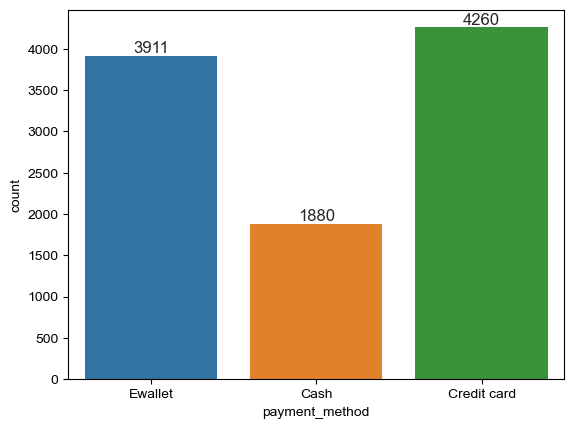

In [17]:
ax = sns.countplot(x="payment_method", data=df)
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

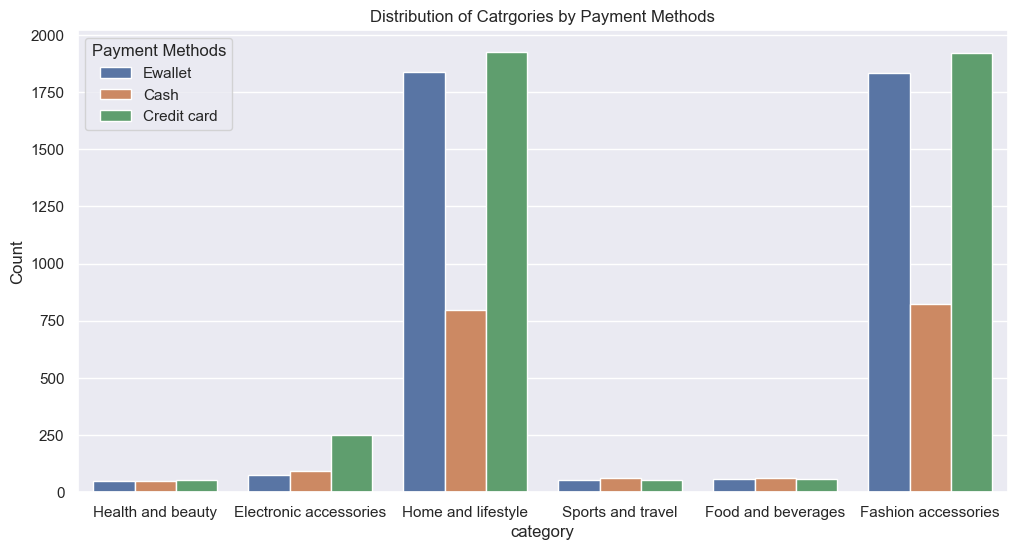

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="category", hue="payment_method", data=df)
plt.title('Distribution of Catrgories by Payment Methods')
plt.ylabel('Count')
plt.legend(title='Payment Methods')
plt.show()

In [19]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df.head(10)

,count
City,
Weslaco,399
Waxahachie,381
Port Arthur,240
Plano,238
Richardson,233
Rockwall,224
Schertz,208
Round Rock,198
Temple,195


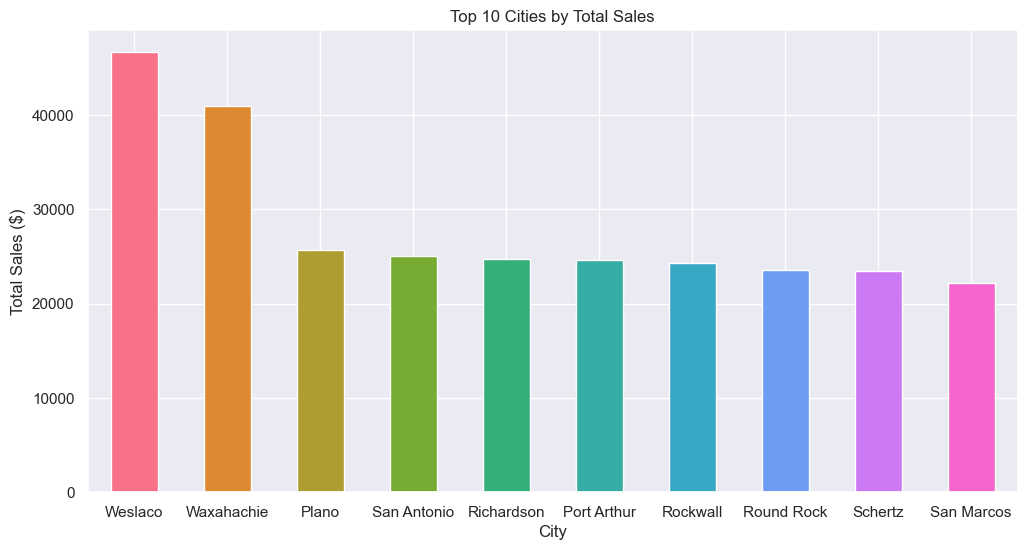

In [20]:
top_cities = df.groupby("City")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
colors = sns.color_palette("husl", len(top_cities))
top_cities.plot(kind="bar", color=colors)
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0)
plt.show()

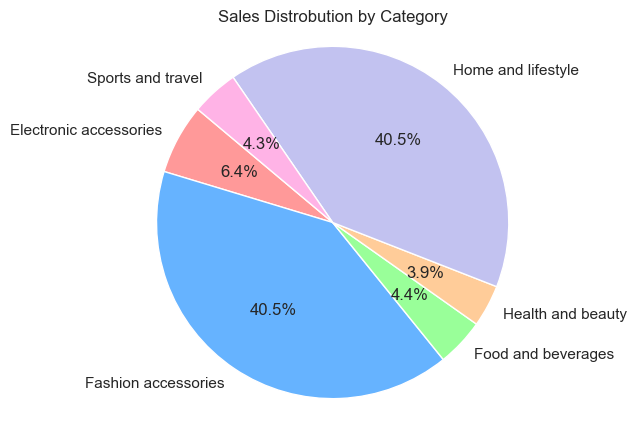

In [21]:
category_sales = df.groupby('category')['Revenue'].sum()

colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"]
plt.pie(category_sales, labels=category_sales.index, autopct="%1.1f%%", startangle=140, colors=colors)

plt.title("Sales Distrobution by Category")
plt.axis("equal")
plt.show()

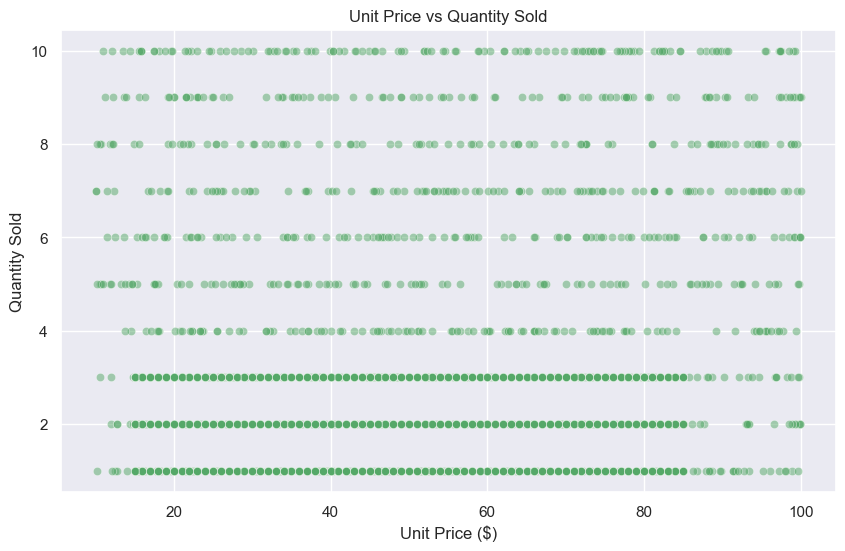

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["unit_price"], y=df["quantity"], alpha=0.5, color="g")
plt.xlabel("Unit Price ($)")
plt.ylabel("Quantity Sold")
plt.title("Unit Price vs Quantity Sold")
plt.show()

C:\Users\manth\AppData\Local\Temp\ipykernel_19752\3852457729.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


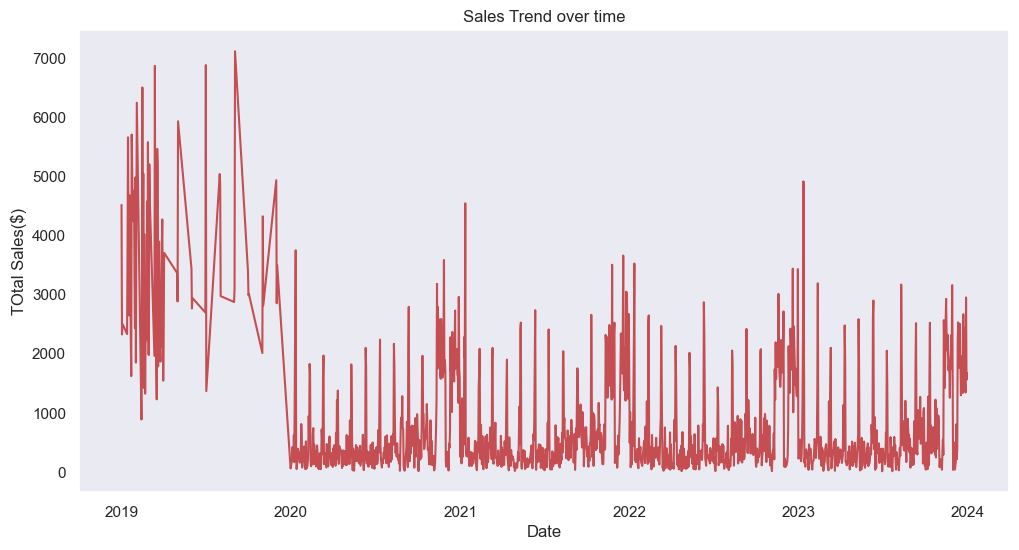

In [23]:
df["date"] = pd.to_datetime(df["date"])
sales_trend = df.groupby("date")['Revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(sales_trend["date"], sales_trend['Revenue'], color="r")
plt.xlabel("Date")
plt.ylabel("TOtal Sales($)")
plt.title("Sales Trend over time")
plt.grid()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


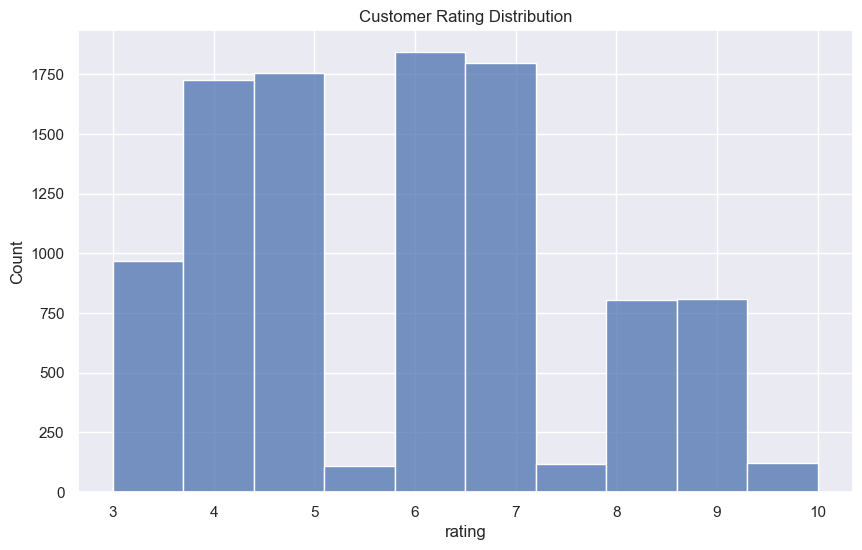

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df["rating"], bins=10)
plt.xlabel("rating")
plt.ylabel("Count")
plt.title("Customer Rating Distribution")
plt.show()

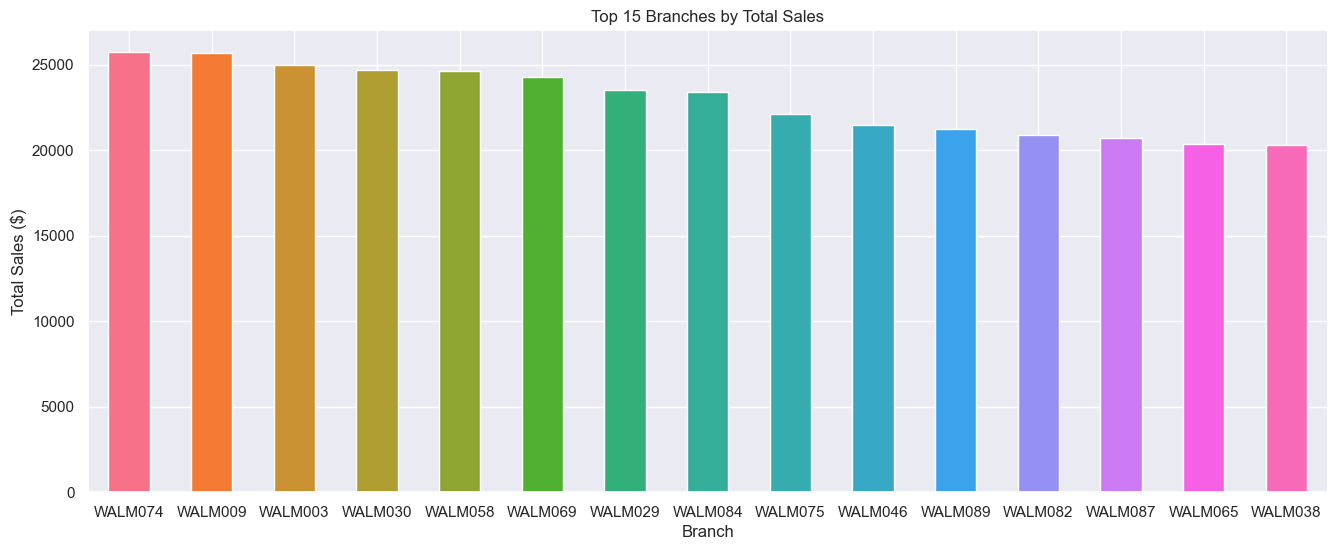

In [25]:
top_cities = df.groupby("Branch")["Revenue"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(16,6))
colors = sns.color_palette("husl", len(top_cities))  
top_cities.plot(kind="bar", color=colors)
plt.title("Top 15 Branches by Total Sales")
plt.xlabel("Branch")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0)
plt.show()